In [ ]:
#reference:https://github.com/Elwing-Chou、https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43

#KMeans(分群)，與KNN不同(監督式學習)在於KMeans是一種非監督式學習，有時數據量太大，或無法人工貼正確標籤時，請電腦自己判斷標籤
'''
k代表需在所有資料中選出k個質量中心，以這k個質量中心分成k類
尋找質量中心步驟:

1.隨機選則k個點當中心
2.將剩餘的資料歸類至k類(每個資料都會計算到各k點的歐式距離，在歸類給近的k點)
3.將分類好的資料再選擇一次k個質量中心，讓質量中心更接近理想
4.重複2、3步驟直到穩定

KMeans++ 改善kMeans第一步驟，讓選初使k時盡量離遠一點，減少穩定次數

k值的選擇
1.已知數據有n類(ex:鳶尾花有三類)，只是沒人幫忙標記類別，可以直接將k設定n類(三類)
2.silhouette score
'''

In [1]:
#讀入資料
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = load_iris()
df = pd.DataFrame(data = iris['data'], columns= iris['feature_names'])
df['taget'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),taget
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#訓練模型
from sklearn.model_selection import train_test_split
data_train, data_test,target_train,target_test = train_test_split(iris['data'], iris['target'],test_size=0.1)
#使用kmeans來訓練:1.創建好cluster 2.使用fit將資料輸入

from sklearn.cluster import KMeans
#已知鳶尾花有三類
#沒有帶入Target
clu = KMeans(n_clusters = 3)
clu.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
#分成三類
clu.labels_

array([1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1,
       0, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0,
       0, 1, 2])

In [10]:
from sklearn.metrics import accuracy_score
predict = clu.predict(data_test)
print("預測",predict)
print("正確標籤",target_test)
print("正確率",accuracy_score(target_test,predict)*100,'%')
#因為沒有事先給標籤，有時需要做轉換再來對照

預測 [0 0 0 2 0 1 2 1 1 1 1 2 2 0 1]
正確標籤 [0 0 0 2 0 1 2 1 1 1 1 2 2 0 2]
正確率 93.33333333333333 %


In [ ]:
#https://en.wikipedia.org/wiki/Silhouette_(clustering)
'''不知道k的時候，必須一個一個測試
以silhouette檢查一個點是不是分在最佳群的方法，分數越高代表每個點離他所在的群距離越近，離另外的群聚離越遠，是好的分群
silhouette值介於-1~1中，依公式s = 1-(a/b)，a越小越好，b越大越好，a為這個點與群內其他點的平均距離，b為這個點與其他群最近點的平均距離
'''

silhouette_score: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3648340039670018, 0.3497423413791637, 0.33912506629106826, 0.33806069945271494]
k_num [2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 0, 'silhouette_score')

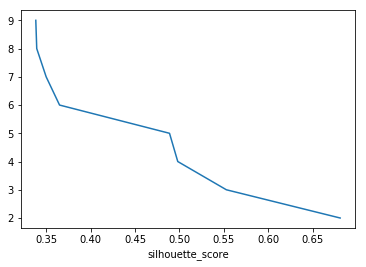

In [14]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
scores = []
knum = []

for i in range(2,10):
    clu = KMeans(n_clusters= i)
    clu.fit(iris['data'])
    clu_score = silhouette_score(iris['data'], clu.labels_)
    scores.append(clu_score)
    knum.append(i)
    
print("silhouette_score:",scores)
print("k_num",knum)
plt.plot(scores,knum)
plt.xlabel('silhouette_score')

In [ ]:
#K=2或K=3會是不錯的選擇